In [4]:
!pip install geopandas



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Load the Excel file
file_path = r'C:\Users\poona\Downloads\Assingment_Dataset.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame
geospatial_data = pd.read_excel(excel_data, sheet_name='Geospatial Data')
satellite_details = pd.read_excel(excel_data, sheet_name='Satellite Details')
news_reports = pd.read_excel(excel_data, sheet_name='News Reports')
historical_incidents = pd.read_excel(excel_data, sheet_name='Historical Incidents')


C:\Users\poona\AppData\Local\Temp\ipykernel_22864\138735773.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=geospatial_data['Longitude'], y=geospatial_data['Latitude'], cmap='Reds', shade=True, bw_adjust=0.5, ax=ax)


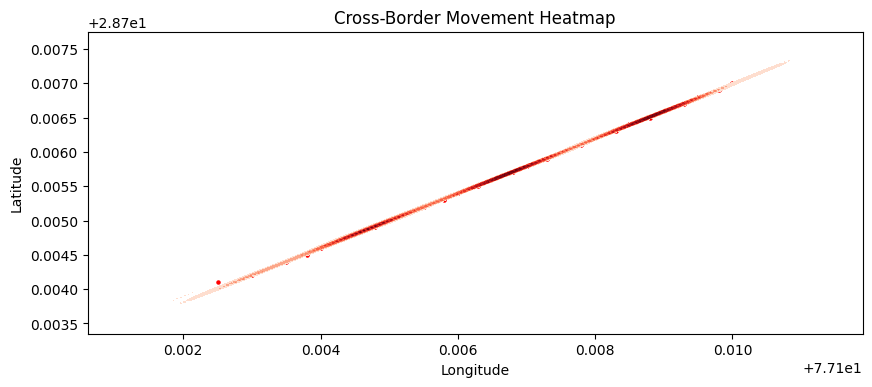

In [10]:
# Create a GeoDataFrame for geospatial data
geometry = [Point(xy) for xy in zip(geospatial_data['Longitude'], geospatial_data['Latitude'])]
geo_df = gpd.GeoDataFrame(geospatial_data, geometry=geometry)

# Plot the movement points on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Generate a heatmap of the movement locations
sns.kdeplot(x=geospatial_data['Longitude'], y=geospatial_data['Latitude'], cmap='Reds', shade=True, bw_adjust=0.5, ax=ax)

# Set plot title and labels
ax.set_title('Cross-Border Movement Heatmap')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [11]:
# Summarize the satellite details to identify significant changes or activities
satellite_details_summary = satellite_details.groupby('Location').agg({
    'Description': 'unique'
}).reset_index()

# Display the summary
print(satellite_details_summary)


              Location                                        Description
0    Border Post Alpha  [High-resolution image showing vehicle movemen...
1    Border Post Bravo  [High-resolution image showing vehicle movemen...
2  Border Post Charlie  [High-resolution image showing vehicle movemen...
3    Border Post Delta  [High-resolution image showing vehicle movemen...
4     Border Post Echo  [High-resolution image showing vehicle movemen...
5  Border Post Foxtrot  [High-resolution image showing vehicle movemen...


In [15]:
# Ensure the date formats are consistent between the datasets
geospatial_data['Timestamp'] = pd.to_datetime(geospatial_data['Timestamp']).dt.date
news_reports['Date'] = pd.to_datetime(news_reports['Date']).dt.date

# Identify the correct location-related column in news_reports
# For example, if the column is named 'Region' or 'Area', use that
# Adjust the following line according to the actual column name

# Merge using the correct column from news_reports
merged_data = pd.merge(geospatial_data, news_reports, left_on='Timestamp', right_on='Date', how='inner')

# If the geospatial data has a 'Location' column and news reports do not, merge only on 'Timestamp' and then analyze

# Display the merged data to identify correlations
print(merged_data[['Timestamp', 'Movement Type', 'Source', 'Title', 'Summary']])

# Example: Count of movements correlated with specific news headlines
correlation_summary = merged_data.groupby('Title')['Movement Type'].count().reset_index()
print(correlation_summary)


     Timestamp Movement Type               Source  \
0   2024-03-01         Entry      National News A   
1   2024-03-05         Entry      Global Security   
2   2024-03-07          Exit         Border Watch   
3   2024-03-09         Entry         Defense News   
4   2024-03-12         Entry      National News B   
5   2024-03-14          Exit         Global Times   
6   2024-03-17         Entry          Border News   
7   2024-03-19          Exit   International News   
8   2024-03-22         Entry       National Daily   
9   2024-03-24          Exit      Defense Insider   
10  2024-03-27         Entry         Border Watch   
11  2024-03-29          Exit      National News A   
12  2024-04-01         Entry      Global Security   
13  2024-04-03          Exit          Border News   
14  2024-04-05         Entry  International Times   
15  2024-04-07          Exit      National News B   
16  2024-04-10         Entry         Defense News   
17  2024-04-12          Exit         Global Ti

In [20]:
# Summarize historical incidents by location
historical_summary = historical_incidents.groupby('Location').agg({
    'Description': 'count',
    'Outcome': 'unique'
}).reset_index()

# Display the historical incident summary
print("HISTORICAL SUMMARY:")
print(historical_summary)

# Combine with current hotspot data
hotspot_analysis = geo_df.groupby('Location').size().reset_index(name='Movements')
threat_assessment = pd.merge(hotspot_analysis, historical_summary, on='Location', how='left')

# Display the threat assessment
print("THREAT ASSESSMENT")
print(threat_assessment)


HISTORICAL SUMMARY:
              Location  Description  \
0    Border Post Alpha            6   
1    Border Post Bravo            6   
2  Border Post Charlie            6   
3    Border Post Delta            6   
4     Border Post Echo            6   

                                             Outcome  
0  [Temporary ceasefire reached, Diplomatic prote...  
1  [Investigation launched, Repairs undertaken, D...  
2  [Ceasefire negotiations initiated, Ceasefire d...  
3  [Humanitarian aid dispatched, Increased survei...  
4  [Increased border patrols, Emergency measures ...  
THREAT ASSESSMENT
              Location  Movements  Description  \
0    Border Post Alpha          5            6   
1    Border Post Bravo          6            6   
2  Border Post Charlie          6            6   
3    Border Post Delta          6            6   
4     Border Post Echo          7            6   

                                             Outcome  
0  [Temporary ceasefire reached, Diplomat